# Data Story Analysis: Price Paid Exploration

## Introduction

This notebook aims to find the best machine learning model for a given dataset. Each code block contributes to various stages of data preparation, exploration, model training, evaluation, and selection. Below is a detailed breakdown of the code and its significance in the process.

### Data Loading and Initial Exploration
The initial part of any data analysis involves loading the dataset and conducting an exploratory data analysis (EDA) to understand its structure and contents.

In [1]:
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!
import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
import xgboost as xgb

#We will beed a modellinglibraru: Statsmodels
import statsmodels.api as sm # contains the model(s)
import statsmodels.tools # contains the metrics and others 

#we get a few ensemble models as well!
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [2]:
# house_df = pd.read_csv('price_paid_records.csv')

## About Dataset

The Price Paid Data includes information on all registered property sales in England and Wales that are sold for full market value. Address details have been truncated to the town/city level.

You might also find the HM Land Registry transaction records to be a useful supplement to this dataset: [Dataset](https://www.kaggle.com/hm-land-registry/uk-land-registry-transactions)

<u><b>The available fields are as follows:</b></u>

Transaction unique identifier A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.

Price Sale price stated on the transfer deed.

Date of Transfer Date when the sale was completed, as stated on the transfer deed.

Property Type:
- D = Detached
- S = Semi-Detached
- T = Terraced
- F = Flats/Maisonettes
- O = Other

__Note that:__

we only record the above categories to describe property type, we do not separately identify bungalows.
end-of-terrace properties are included in the Terraced category above.

‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values.

Old/New Indicates the age of the property and applies to all price paid transactions, residential and non-residential.

- Y = a newly built property
- N = an established residential building

Duration Relates to the tenure: 
- F = Freehold
- L = Leasehold etc.

__Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.__

- Town/City

- District

- County

PPD Category Type Indicates the type of Price Paid transaction.

- A = Standard Price Paid entry, includes single residential property sold for full market value.
- B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals. Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.

Record Status - monthly file only Indicates additions, changes and deletions to the records.(see guide below).

- A = Addition
- C = Change
- D = Delete.

Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier.

This data was kindly released by HM Land Registry under the Open Government License 3.0. 

## Dataset info 

- 22489348 Rows of data (2000000 for the random subset)
- 11 columns 
- Column names 
    - Transaction unique identifier
    - Price
    - Date of Transfer
    - Property Type
    - Old/New
    - Duration
    - Town/City
    - District
    - County
    - PPDCategory Type
    - Record Status - month file only

## Random subset of the data 

Creating and saving a random subset of the data as the original data is too large to run at this moment

In [3]:
# import random
# import pandas as pd
# import numpy as np

# # Generate a random sample of unique indices
# subset_size = 2000000
# random_indices = np.random.choice(len(house_df), subset_size, replace=False)

# # Create the random subset DataFrame using the indices
# house_df_rs = house_df.iloc[random_indices]

# house_df_rs

In [4]:
# house_df_rs.shape

In [5]:
# house_df_rs.to_csv('house_df_rs', index=False)

In [6]:
house_df = pd.read_csv('house_df_rs')

## Checking the dataset matches the Meta Data

### Output Significance:

- The output shows the first few rows, giving insight into the columns, data types, and potential anomalies.

In [7]:
house_df.head() # Checking the dataset was read in as well as column names

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{AB69522A-300A-4122-B95B-DEF700873018},50500,1998-06-12 00:00,S,N,L,TAMWORTH,TAMWORTH,STAFFORDSHIRE,A,A
1,{AA9CF0FB-E7BF-4CD6-9E9C-75FD65E58524},66500,2001-10-31 00:00,S,N,F,MARKET HARBOROUGH,HARBOROUGH,LEICESTERSHIRE,A,A
2,{6BDF5B7F-D4B9-4758-9963-696F028752A4},15000,2000-09-01 00:00,T,N,F,STANLEY,DERWENTSIDE,DURHAM,A,A
3,{6CA43CD3-85D2-4519-8EE2-C2B1AB4F843F},189952,2002-12-20 00:00,D,Y,F,NORWICH,SOUTH NORFOLK,NORFOLK,A,A
4,{4042A5EF-C662-43CE-996F-F5D7A54BC03E},77300,1997-06-27 00:00,T,N,F,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,A,A


In [8]:
house_df.shape # checking for the number of rows and columns

(2000000, 11)

In [9]:
house_df.dtypes # checking the data types

Transaction unique identifier        object
Price                                 int64
Date of Transfer                     object
Property Type                        object
Old/New                              object
Duration                             object
Town/City                            object
District                             object
County                               object
PPDCategory Type                     object
Record Status - monthly file only    object
dtype: object

In [10]:
house_df.describe(include = 'all')

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
count,2000000,2.000000e+06,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000,2000000
unique,2000000,NaN,7752,5,2,3,1163,451,127,2,1
top,{AB69522A-300A-4122-B95B-DEF700873018},NaN,2016-03-31 00:00,T,N,F,LONDON,BIRMINGHAM,GREATER LONDON,A,A
freq,1,NaN,2913,616520,1796714,1527740,159078,29384,266835,1968842,2000000
mean,NaN,1.783142e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.971696e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,7.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.300000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.100000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Preprocessing

Data cleaning is crucial to handle missing values, correct data types, and prepare the data for analysis.

**Explanation:**

- Missing Values Check: Identifies columns with missing values.
- Handling Missing Values: Drops rows with missing values to ensure clean data.
- Data Type Correction: Ensures Date is in datetime format.

**Output Significance:**

- The absence of missing values and correct data types is essential for accurate analysis and model training.

In [11]:
#making sure the date is in the right format for python
house_df['Date of Transfer'] = pd.to_datetime(house_df['Date of Transfer'], format='%Y-%m-%d')

In [12]:
house_df.dtypes

Transaction unique identifier                object
Price                                         int64
Date of Transfer                     datetime64[ns]
Property Type                                object
Old/New                                      object
Duration                                     object
Town/City                                    object
District                                     object
County                                       object
PPDCategory Type                             object
Record Status - monthly file only            object
dtype: object

In [13]:
# checking the classification options are the same as the meta data
print(f"Property type options are : {house_df['Property Type'].unique()}")
print(f"Old/New options are : {house_df['Old/New'].unique()}")
print(f"Duration options are : {house_df['Duration'].unique()}")
print(f"PPDCategory Type options are : {house_df['PPDCategory Type'].unique()}")
print(f"Record Status - monthly file only options are : {house_df['Record Status - monthly file only'].unique()}")

Property type options are : ['S' 'T' 'D' 'F' 'O']
Old/New options are : ['N' 'Y']
Duration options are : ['L' 'F' 'U']
PPDCategory Type options are : ['A' 'B']
Record Status - monthly file only options are : ['A']


In [14]:
# The Duration column has an extra category that is not mentioned in the metadata, but is only present for less than 1% of the time
print(f"'F' sum : {house_df['Duration'].value_counts()[0]}, percentage : {(house_df['Duration'].value_counts()[0])/(house_df['Duration'].value_counts().sum())}")
print(f"'L' sum : {house_df['Duration'].value_counts()[1]}, percentage : {(house_df['Duration'].value_counts()[1])/(house_df['Duration'].value_counts().sum())}")
print(f"'U' sum : {house_df['Duration'].value_counts()[2]}, percentage : {(house_df['Duration'].value_counts()[2])/(house_df['Duration'].value_counts().sum())}")

'F' sum : 1527740, percentage : 0.76387
'L' sum : 472196, percentage : 0.236098
'U' sum : 64, percentage : 3.2e-05


In [15]:
# Checking the number of unique values for the non categorical columns
print(f"Number of unique values in Town/City : {house_df['Town/City'].nunique()}")
print(f"Number of unique values in District : {house_df['District'].nunique()}")
print(f"Number of unique values in County : {house_df['County'].nunique()}")

Number of unique values in Town/City : 1163
Number of unique values in District : 451
Number of unique values in County : 127


## Checking for nulls

In [16]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [17]:
null_vals(house_df)

,null,percent
Transaction unique identifier,0,0.0
Price,0,0.0
Date of Transfer,0,0.0
Property Type,0,0.0
Old/New,0,0.0
Duration,0,0.0
Town/City,0,0.0
District,0,0.0
County,0,0.0
PPDCategory Type,0,0.0


For now, since there are no nulls, there is no mention of 'U' in the metadata for the Duration column and it's apperance is less than 1 %, I will be dropping it from the dataframe.

In [18]:
house_df = house_df.loc[house_df['Duration'] != 'U', : ]

In [19]:
house_df.shape

(1999936, 11)

## Encoding

Exploring potential encoding that will be used later for the feature enginerring when train test splitting

In [20]:
house_df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

In [21]:
#One Hot- Encoding the categorical columns
house_df_ohe = pd.get_dummies(data=house_df,                 # Select data to dummy
                    columns=['Property Type', 'Old/New', 'Duration','PPDCategory Type', 'Record Status - monthly file only'],# Which columns to OHE
                    prefix = None,               # Wish to add a prefix to the results?
                    drop_first = False,          # Want to drop the first dimension?
                    dtype = int)                 # What's the desired data type of the result?


One Hot Encoding will be used for categorical coumns.

With the precense of extra columns, to maximise effeciency, during feature engineering, the drop_first parameter will be True.

In [22]:
# The OHE data
house_df_ohe.head()

,Transaction unique identifier,Price,Date of Transfer,Town/City,District,County,Property Type_D,Property Type_F,Property Type_O,Property Type_S,Property Type_T,Old/New_N,Old/New_Y,Duration_F,Duration_L,PPDCategory Type_A,PPDCategory Type_B,Record Status - monthly file only_A
0,{AB69522A-300A-4122-B95B-DEF700873018},50500,1998-06-12,TAMWORTH,TAMWORTH,STAFFORDSHIRE,0,0,0,1,0,1,0,0,1,1,0,1
1,{AA9CF0FB-E7BF-4CD6-9E9C-75FD65E58524},66500,2001-10-31,MARKET HARBOROUGH,HARBOROUGH,LEICESTERSHIRE,0,0,0,1,0,1,0,1,0,1,0,1
2,{6BDF5B7F-D4B9-4758-9963-696F028752A4},15000,2000-09-01,STANLEY,DERWENTSIDE,DURHAM,0,0,0,0,1,1,0,1,0,1,0,1
3,{6CA43CD3-85D2-4519-8EE2-C2B1AB4F843F},189952,2002-12-20,NORWICH,SOUTH NORFOLK,NORFOLK,1,0,0,0,0,0,1,1,0,1,0,1
4,{4042A5EF-C662-43CE-996F-F5D7A54BC03E},77300,1997-06-27,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,0,0,0,0,1,1,0,1,0,1,0,1


'Town/City', 'District', 'County' columns have too many entries to use OHE. Since making them categorical numerical values will cause certain models treat these categories as values, these columns will not be used in Regression models but will be used in classification models.

In [23]:
# label encode
houes_location_label = pd.DataFrame()                   # Create an empty dataframe to start
cols_to_label = ['Town/City', 'District', 'County']      # Select columns to encode

for col in cols_to_label:                   # Loop through chosen columns
    houes_location_label[col] = house_df[col].astype('category').cat.codes # Label encode each column
    
houes_location_label['Price'] = house_df['Price']

In [24]:
# The labelled data
houes_location_label.head()

,Town/City,District,County,Price
0,996,380,100,50500
1,657,169,63,66500
2,956,117,39,15000
3,736,345,75,189952
4,208,58,14,77300


## Feature Selection 

### Using a Heatmap to check for correlations 

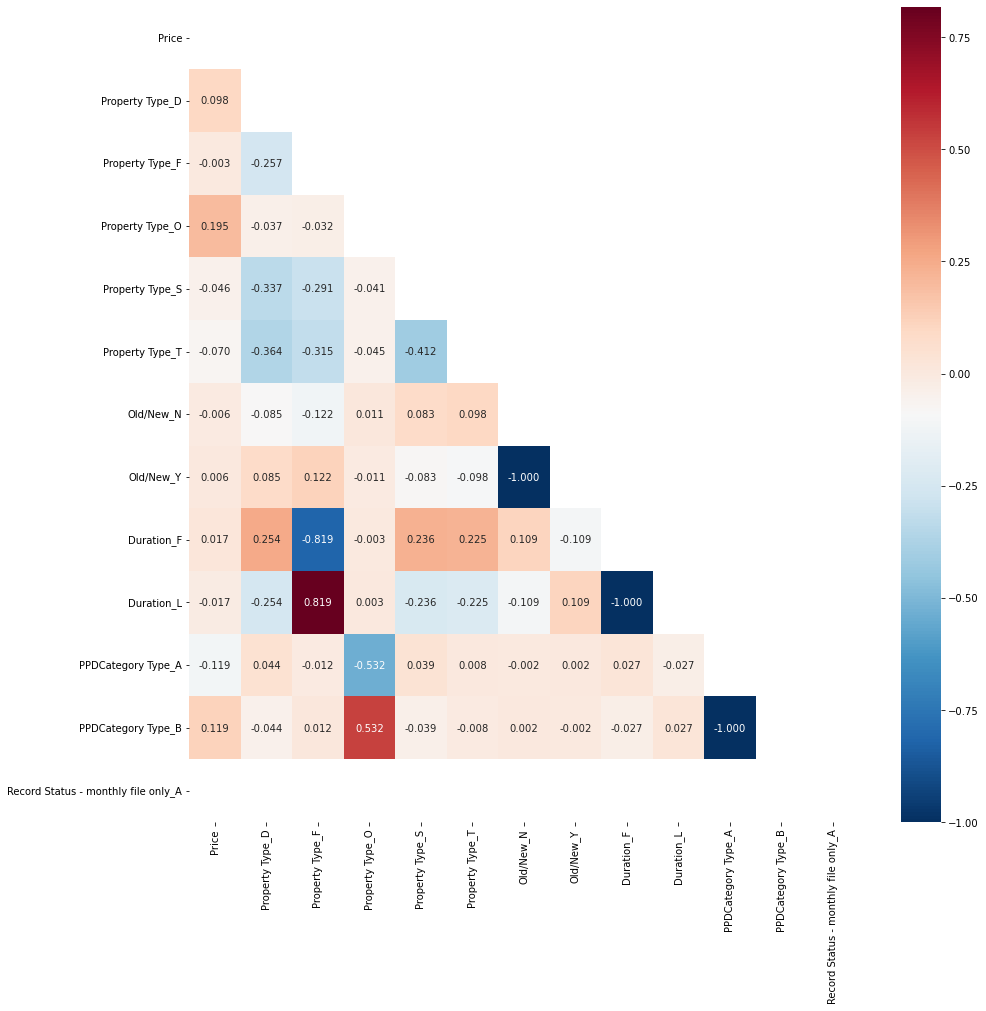

In [25]:
plt.figure(figsize = (15,15))

sns.heatmap(house_df_ohe.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(house_df_ohe.corr()))
plt.show()

In [26]:
house_df_ohe.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Town/City', 'District', 'County', 'Property Type_D', 'Property Type_F',
       'Property Type_O', 'Property Type_S', 'Property Type_T', 'Old/New_N',
       'Old/New_Y', 'Duration_F', 'Duration_L', 'PPDCategory Type_A',
       'PPDCategory Type_B', 'Record Status - monthly file only_A'],
      dtype='object')

These correlations show the importance of using the drop_first parameter in OHE. There will be alot of colinearity without it.

Using this correlations will help in figuring out which columns will enhance the machine learning model by knowing which columns to keep.

In [27]:
#house_df_ohe[['Price', 'Property Type_D']].corr().iloc[0,1]
columns_df = ['Price', 'Property Type_D', 'Property Type_F',
       'Property Type_O', 'Property Type_S', 'Property Type_T', 'Old/New_N',
       'Old/New_Y', 'Duration_F', 'Duration_L', 'PPDCategory Type_A',
       'PPDCategory Type_B', 'Record Status - monthly file only_A']

for i in columns_df:
    cor_list = []
    for j in columns_df:
        cor = house_df_ohe[i].corr(house_df_ohe[j])
        if i != j and (cor > 0.25 or cor < -0.25):
            cor_list.append(f'{j} - {round(cor,2)}')
    print(f'{i} has strong correlation with : {cor_list}')

#house_df_ohe.corr()

Price has strong correlation with : []
Property Type_D has strong correlation with : ['Property Type_F - -0.26', 'Property Type_S - -0.34', 'Property Type_T - -0.36', 'Duration_F - 0.25', 'Duration_L - -0.25']
Property Type_F has strong correlation with : ['Property Type_D - -0.26', 'Property Type_S - -0.29', 'Property Type_T - -0.31', 'Duration_F - -0.82', 'Duration_L - 0.82']
Property Type_O has strong correlation with : ['PPDCategory Type_A - -0.53', 'PPDCategory Type_B - 0.53']
Property Type_S has strong correlation with : ['Property Type_D - -0.34', 'Property Type_F - -0.29', 'Property Type_T - -0.41']
Property Type_T has strong correlation with : ['Property Type_D - -0.36', 'Property Type_F - -0.31', 'Property Type_S - -0.41']
Old/New_N has strong correlation with : ['Old/New_Y - -1.0']
Old/New_Y has strong correlation with : ['Old/New_N - -1.0']
Duration_F has strong correlation with : ['Property Type_D - 0.25', 'Property Type_F - -0.82', 'Duration_L - -1.0']
Duration_L has stro

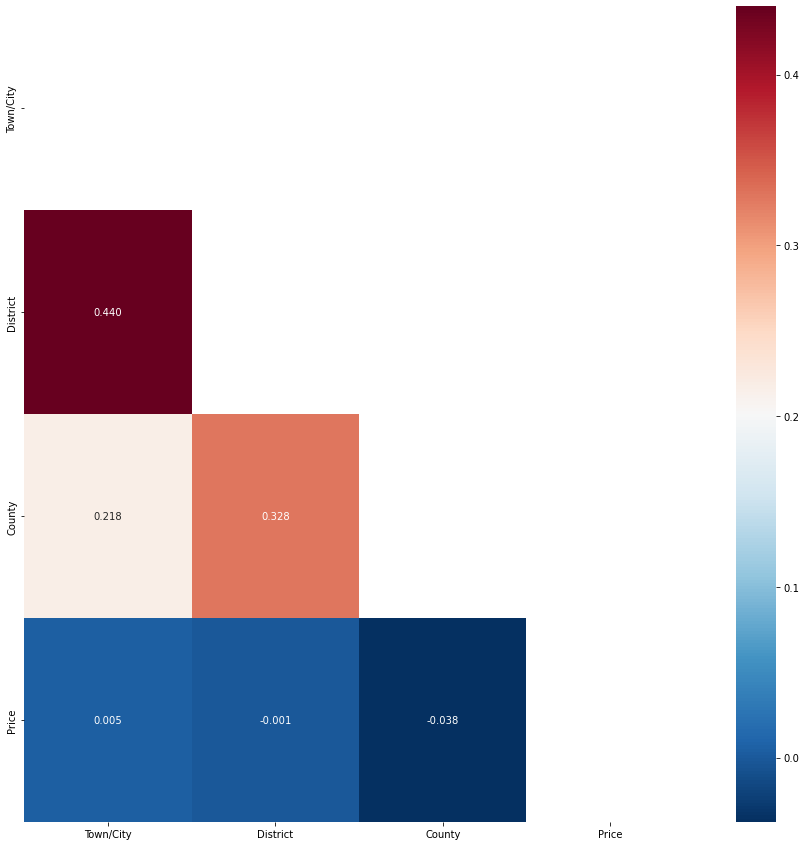

In [28]:
plt.figure(figsize = (15,15))

sns.heatmap(houes_location_label.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(houes_location_label.corr()))
plt.show()

In [29]:
for i in houes_location_label.columns:
    cor_list = []
    for j in houes_location_label.columns:
        cor = houes_location_label[i].corr(houes_location_label[j])
        if i != j and (cor > 0.1 or cor < -0.1):
            cor_list.append(f'{j} - {round(cor,2)}')
    print(f'{i} has strong correlation with : {cor_list}')

Town/City has strong correlation with : ['District - 0.44', 'County - 0.22']
District has strong correlation with : ['Town/City - 0.44', 'County - 0.33']
County has strong correlation with : ['Town/City - 0.22', 'District - 0.33']
Price has strong correlation with : []


There are some correlations between the columns and price with some colinearity present.

Due to the large number of categories in 'Town/City', 'District', 'County', they will not be one hot encoded and added as features when using Linear regression but will be used in Random Forest models and comapre to see if this the difference in RMSE makes a difference.

### Train-Test Split

In [30]:
house_df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

In [31]:
#Creating the feature engineering function, to OHE, categorical columns and add a constant collumn for stats models

def feature_engineering(df):
        df = df.copy()
        df = pd.get_dummies(df,                 # Select data to dummy
                        columns=['Property Type', 'Old/New', 'Duration','PPDCategory Type', 'Record Status - monthly file only'],# Which columns to OHE
                        prefix = None,               # Wish to add a prefix to the results?
                        drop_first = True,          # Want to drop the first dimension?
                        dtype = int)
        df['const'] = 1.0 #adding a constant because we'll use statsmodels
    
        return df

Due to the nature of the dataset and encoding, during splitting the dataset, there could be a mismatch in columns between the training and testing set. So using this check, it will ensure to print out a random state where the columns are equal

In [32]:
# Initialize a counter for the random state
random_state = 0

while True:
    X = house_df.drop('Price', axis=1) # The features
    y = house_df['Price'] # The Target
    
    # Perform train-test split with the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, # The features
                                                    y, # The Target
                                                    test_size=0.2, #what % are we dedicating to the testing set ?
                                                    random_state=201 #Random set, the number specifies the specific ramdon shuffel
                                                   )
    
    # Apply feature engineering
    X_train_fe = feature_engineering(X_train)
    X_test_fe = feature_engineering(X_test)
    
    # Check if the columns match
    if list(X_train_fe.columns) == list(X_test_fe.columns):
        break
    
    # Increment the random state
    random_state += 1
    
    # A condition to avoid infinite loop
    if random_state > 1000:
        print("Couldn't find matching columns within 1000 random states.")
        break

print(f"Matching columns found with random state {random_state}")

Matching columns found with random state 0


### Train - Test Splitting process

In [33]:
# The Train test splitting 
X = house_df.drop('Price', axis=1) # The features
y = house_df['Price'] # The Target

X_train, X_test, y_train, y_test = train_test_split(X, # The features
                                                    y, # The Target
                                                    test_size=0.2, #what % are we dedicating to the testing set ?
                                                    random_state=0 #Random set, the number specifies the specific ramdon shuffel
                                                   )

In [34]:
# Check tkhat the incidies ended up the same in both sets
print(all(X_train.index == y_train.index))
print(all(X_test.index == y_test.index))

True
True


### Feature Engineering

In [35]:
X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

In [36]:
#Another check to ensure the column are consistant
list(X_train_fe.columns) == list(X_test_fe.columns)

True

### Creating Models and Scores

#### Linear Regression

In [37]:
X_train_fe.columns

Index(['Transaction unique identifier', 'Date of Transfer', 'Town/City',
       'District', 'County', 'Property Type_F', 'Property Type_O',
       'Property Type_S', 'Property Type_T', 'Old/New_Y', 'Duration_L',
       'PPDCategory Type_B', 'const'],
      dtype='object')

In [38]:
feature_cols_lin = ['Property Type_F', 'Property Type_O',
       'Property Type_S', 'Property Type_T', 'Old/New_Y', 'Duration_L',
       'PPDCategory Type_B', 'const']

This will be showing the baseline results

In [39]:
## create and train an OLS linear regression
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols_lin]) #creating the model (#target, features)
lin_results = lin_reg.fit() #fit our model and store it 
lin_results.summary() # take a look at out results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:21   Log-Likelihood:            -2.2864e+07
No. Observations:             1599948   AIC:                         4.573e+07
Df Residuals:                 1599940   BIC:                         4.573e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Property Type_F    -3.407e+04   1529.951    -22.269      0.000   -3.71e+04   -3.11e+04
Property Type_O     1.016e+06   5481.358    185.355      0.000    1.01e+06    1.03e+06
Property Type_S    -1.005e+05    874.822   -114.936      0.000   -1.02e+05   -9.88e+04
Property Type_T    -1.122e+05    856.571   -130.967      0.000   -1.14e+05   -1.11e+05
Old/New_Y          -6273.9067   1033.339     -6.071      0.000   -8299.215   -4248.598
Duration_L         -4.387e+04   1268.122    -34.597      0.000   -4.64e+04   -4.14e+04
PPDCategory Type_B  7.814e+04   2936.396     26.612      0.000    7.24e+04    8.39e+04
const                2.52e+05    661.851    380.770      0.000    2.51e+05    2.53e+05
==============================================================================
Omnibus:                  6312042.714   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   18974652226660.766
Skew:                          97.728   Prob(JB):                         0.00
Kurtosis:                   16872.820   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
## What about the actual performance?

#get out pridictions and store them in y_pred
y_pred = lin_results.predict(X_train_fe[feature_cols_lin])

#get the RMSE od our model: y_train(real) against y_pred (predicted)
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred) #(real value, predicted)

#lets print out the RMSE
print(rmse)

389071.93337259075


In [41]:
#lets predict on test as well
#y_test_pred holds the prediction on the testing set
y_test_pred = lin_results.predict(X_test_fe[feature_cols_lin])

#get the testing rmse
rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)

#print it out
print(rmse_test)

377828.9281406184


We will be looking at if it is possible to improve the rmse score

We will be removing columns that have strong correlation betweent each other

In [42]:
lin_columns_df = ['Property Type_F', 'Property Type_O',
       'Property Type_S', 'Property Type_T', 'Old/New_Y', 'Duration_L',
       'PPDCategory Type_B', 'const']
lin_cor_dict = {}

for i in lin_columns_df:
    lin_cor_list = []
    for j in lin_columns_df:
        lin_cor = X_train_fe[i].corr(X_train_fe[j])
        if i != j and (lin_cor > 0.25 or lin_cor < -0.25):
            lin_cor_list.append({j})
    lin_cor_dict[i] = lin_cor_list
    
print(lin_cor_dict)


{'Property Type_F': [{'Property Type_S'}, {'Property Type_T'}, {'Duration_L'}], 'Property Type_O': [{'PPDCategory Type_B'}], 'Property Type_S': [{'Property Type_F'}, {'Property Type_T'}], 'Property Type_T': [{'Property Type_F'}, {'Property Type_S'}], 'Old/New_Y': [], 'Duration_L': [{'Property Type_F'}], 'PPDCategory Type_B': [{'Property Type_O'}], 'const': []}


In [43]:
lin_columns_df_2 = ['Property Type_F', 'Property Type_O',
        'Old/New_Y', 'const']
def lin_reg_func(columns, rmse_score, rmse_test_score):
    lin_reg_2 = sm.OLS(y_train, X_train_fe[columns]) #creating the model (#target, features)
    lin_results_2 = lin_reg_2.fit() #fit our model and store it 
    print(lin_results_2.summary()) # take a look at out results

    ## What about the actual performance?

    #get out pridictions and store them in y_pred
    y_pred_2 = lin_results_2.predict(X_train_fe[columns])

    #get the RMSE od our model: y_train(real) against y_pred (predicted)
    rmse_2 = statsmodels.tools.eval_measures.rmse(y_train, y_pred_2) #(real value, predicted)

    def better_score(score_1, score_2):
        if score_1 > score_2:
            return 'Better Score'
        elif score_1 == score_2:
            return 'Same Score'
        else:
            return 'Worse Score'

    #lets predict on test as well
    #y_test_pred holds the prediction on the testing set
    y_test_pred_2 = lin_results_2.predict(X_test_fe[columns])

    #get the testing rmse
    rmse_test_2 = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred_2)

    #lets print out the RMSE scores
    print(f' train_2 : {rmse_2}, train : {rmse_score}, {better_score(rmse_score,rmse_2)}')
    print(f' test_2 : {rmse_test_2}, test : {rmse_test_score}, {better_score(rmse_test_score,rmse_test_2)}')

In [44]:
lin_reg_func(lin_columns_df_2, rmse, rmse_test) # correlation edits compare with baseline score

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                 2.105e+04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:24   Log-Likelihood:            -2.2875e+07
No. Observations:             1599948   AIC:                         4.575e+07
Df Residuals:                 1599944   BIC:                         4.575e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Property Type_F  1982.7917    809.844     

We see that reducing the columns based on correlation with each other did not improve the score 

We will look at only using property columns

In [45]:
property_cols_lin = ['Property Type_F', 'Property Type_O',
       'Property Type_S', 'Property Type_T', 'const']

lin_reg_func(property_cols_lin, rmse, rmse_test) # property type edits compare with basline scores

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                 2.106e+04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:25   Log-Likelihood:            -2.2865e+07
No. Observations:             1599948   AIC:                         4.573e+07
Df Residuals:                 1599943   BIC:                         4.573e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Property Type_F -7.429e+04    966.563    -

In [46]:
lin_reg_func(property_cols_lin, 391769.28979225556, 380572.17843168316) # property type edits compare with correlation edits

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                 2.106e+04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:25   Log-Likelihood:            -2.2865e+07
No. Observations:             1599948   AIC:                         4.573e+07
Df Residuals:                 1599943   BIC:                         4.573e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Property Type_F -7.429e+04    966.563    -

We can see that the rmse using propety columns did better than the columns from correlation but still not better than the original

Now we will look at non property colums

In [47]:
non_property_cols_lin = ['Old/New_Y', 'Duration_L',
       'PPDCategory Type_B', 'const']

lin_reg_func(non_property_cols_lin, rmse, rmse_test) # non property type edits compare with basline scores

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7939.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:26   Log-Likelihood:            -2.2894e+07
No. Observations:             1599948   AIC:                         4.579e+07
Df Residuals:                 1599944   BIC:                         4.579e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Old/New_Y           1.184e+04   1043

In [48]:
lin_reg_func(non_property_cols_lin, 389308.76189117454, 378059.72543943534) # non property type edits compare with property type edits

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7939.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:26   Log-Likelihood:            -2.2894e+07
No. Observations:             1599948   AIC:                         4.579e+07
Df Residuals:                 1599944   BIC:                         4.579e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Old/New_Y           1.184e+04   1043

In [49]:
lin_reg_func(non_property_cols_lin, 391769.28979225556, 380572.17843168316) # non property type edits compare with correlation edits

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7939.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:27   Log-Likelihood:            -2.2894e+07
No. Observations:             1599948   AIC:                         4.579e+07
Df Residuals:                 1599944   BIC:                         4.579e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Old/New_Y           1.184e+04   1043

From these tests, we can see that the baseline results are the best result, so using these columns :
```Python
lin_columns_df = ['Property Type_F', 'Property Type_O',
       'Property Type_S', 'Property Type_T', 'Old/New_Y', 'Duration_L',
       'PPDCategory Type_B', 'const']
```
Will give us the best RMSE, reducing the columns based on correlation, property type and non property type does not improve the score.

But we see that looking at property type will give more information than looking at correlations has the property type columns gave a better rmse score than the correlation columns

## Logistic Regression

In [50]:
X_train_fe.columns

Index(['Transaction unique identifier', 'Date of Transfer', 'Town/City',
       'District', 'County', 'Property Type_F', 'Property Type_O',
       'Property Type_S', 'Property Type_T', 'Old/New_Y', 'Duration_L',
       'PPDCategory Type_B', 'const'],
      dtype='object')

In [51]:
feature_cols_log = ['Property Type_F', 'Property Type_O',
       'Property Type_S', 'Property Type_T', 'Old/New_Y', 'Duration_L',
       'PPDCategory Type_B']

In [52]:
print(y_train.min())
print(y_train.max())

1
98446300


In [53]:
# Transform the continuous target variable into categorical bins
# Using pd.cut
bins = [y_train.min(), 100000, 500000, y_train.max()]
labels = [0, 1, 2]
y_train_categorical = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True).astype(int)

In [54]:
#Create a model
#Get the underlying algorithm ready to go
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

model.fit(X_train_fe[feature_cols_log], y_train_categorical)

# Note: XGBoost does not have a summary method for XGBClassifier
# If you want to inspect the model, you can use model.get_booster().get_fscore() or model.get_params()
model.get_booster().get_fscore()


{'Property Type_F': 437.0,
 'Property Type_O': 349.0,
 'Property Type_S': 223.0,
 'Property Type_T': 329.0,
 'Old/New_Y': 1308.0,
 'Duration_L': 1264.0,
 'PPDCategory Type_B': 1423.0}

Here we will have our baseline score

In [55]:
y_pred_log = model.predict(X_train_fe[feature_cols_log])

rmse_log = metrics.mean_squared_error(y_train_categorical,y_pred_log, squared=False)
print(rmse_log)

0.6406629102666621


In [56]:
# Transform the continuous target variable into categorical bins
y_test_categorical = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True).astype(int)

In [57]:
#lets predict on test as well
#y_test_pred holds the prediction on the testing set
y_test_pred_log = model.predict(X_test_fe[feature_cols_log])

#get the testing rmse
rmse_test_log = statsmodels.tools.eval_measures.rmse(y_test_categorical, y_test_pred_log)

#print it out
print(rmse_test_log)

0.6421895142566302


In [58]:
# label encode
houes_location_label = pd.DataFrame()                   # Create an empty dataframe to start
cols_to_label = ['Town/City', 'District', 'County']      # Select columns to encode

for col in cols_to_label:                   # Loop through chosen columns
    houes_location_label[col] = house_df[col].astype('category').cat.codes # Label encode each column
    
houes_location_label['Price'] = house_df['Price']

In [59]:
def log_reg_func(columns,rmse_score,rmse_test_score):
    #Create a model
    #Get the underlying algorithm ready to go
    model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

    model.fit(X_train_fe[columns], y_train_categorical)

    # If you want to inspect the model, you can use model.get_booster().get_fscore() or model.get_params()
    print(model.get_booster().get_fscore())
    
    y_pred_log = model.predict(X_train_fe[columns])

    rmse_log_2 = metrics.mean_squared_error(y_train_categorical,y_pred_log, squared=False)
    
    #y_test_pred holds the prediction on the testing set
    y_test_pred_log = model.predict(X_test_fe[columns])

    #get the testing rmse
    rmse_test_log = statsmodels.tools.eval_measures.rmse(y_test_categorical, y_test_pred_log)
    
    def better_score(score_1, score_2):
        if score_1 > score_2:
            return 'Better Score'
        elif score_1 == score_2:
            return 'Same Score'
        else:
            return 'Worse Score'
        
    #lets print out the RMSE scores
    print(f' train_2 : {rmse_log_2}, train : {rmse_score}, {better_score(rmse_score,rmse_log_2)}')
    print(f' test_2 : {rmse_test_log}, test : {rmse_test_score}, {better_score(rmse_test_score,rmse_test_log)}')

Changing the columns and comparing the scores to see if we can see an improvement

In [60]:
log_reg_func(lin_columns_df_2[0:3],rmse_log,rmse_test_log) # comparing the correlation edit to the baseline score

{'Property Type_F': 255.0, 'Property Type_O': 231.0, 'Old/New_Y': 339.0}
 train_2 : 0.6408565343785407, train : 0.6406629102666621, Worse Score
 test_2 : 0.640850856826002, test : 0.6421895142566302, Better Score


In [61]:
log_reg_func(property_cols_lin[0:4],rmse_log,rmse_test_log) # comparing the property edit to the baseline score

{'Property Type_F': 193.0, 'Property Type_O': 157.0, 'Property Type_S': 208.0, 'Property Type_T': 202.0}
 train_2 : 0.6475650574006954, train : 0.6406629102666621, Worse Score
 test_2 : 0.648814402432517, test : 0.6421895142566302, Worse Score


In [62]:
log_reg_func(property_cols_lin[0:4],0.6408565343785407,0.640850856826002) # comparing the property edit to the correlation score

{'Property Type_F': 193.0, 'Property Type_O': 157.0, 'Property Type_S': 208.0, 'Property Type_T': 202.0}
 train_2 : 0.6475650574006954, train : 0.6408565343785407, Worse Score
 test_2 : 0.648814402432517, test : 0.640850856826002, Worse Score


In [63]:
log_reg_func(non_property_cols_lin[0:3],rmse_log,rmse_test_log) # comparing the non property edit to the baseline score

{'Old/New_Y': 415.0, 'Duration_L': 406.0, 'PPDCategory Type_B': 311.0}
 train_2 : 0.6409052969721735, train : 0.6406629102666621, Worse Score
 test_2 : 0.6409425280161448, test : 0.6421895142566302, Better Score


In [64]:
log_reg_func(non_property_cols_lin[0:3],0.6408565343785407,0.640850856826002) # comparing the non property edit to the correlation score

{'Old/New_Y': 415.0, 'Duration_L': 406.0, 'PPDCategory Type_B': 311.0}
 train_2 : 0.6409052969721735, train : 0.6408565343785407, Worse Score
 test_2 : 0.6409425280161448, test : 0.640850856826002, Worse Score


In [65]:
log_reg_func(non_property_cols_lin[0:3],0.6475650574006954,0.648814402432517) # comparing the non property edit to the property edit score

{'Old/New_Y': 415.0, 'Duration_L': 406.0, 'PPDCategory Type_B': 311.0}
 train_2 : 0.6409052969721735, train : 0.6475650574006954, Better Score
 test_2 : 0.6409425280161448, test : 0.648814402432517, Better Score


Seeing as the correlation edit gave us a better test score than the basline score, we will use these columns with different random state to see if we can produce a better rmse.

## Decision Tree

In [68]:
def feature_labelling(df):
    df.copy()
    # label encode
    df_new = pd.DataFrame()                   # Create an empty dataframe to start
    #cols_to_label = ['Town/City', 'District', 'County']      # Select columns to encode

    for col in df.columns:                   # Loop through chosen columns
        df_new[col] = df[col].astype('category').cat.codes # Label encode each column
    
    return df_new

In [69]:
# The Train test splitting 
X = house_df.drop('Price', axis=1) # The features
y = house_df['Price'] # The Target

X_train, X_test, y_train, y_test = train_test_split(X, # The features
                                                    y, # The Target
                                                    test_size=0.2, #what % are we dedicating to the testing set ?
                                                    random_state=0 #Random set, the number specifies the specific ramdon shuffel
                                                   )

In [70]:
X_train_fe = feature_labelling(X_train)
X_test_fe = feature_labelling(X_test)

In [71]:
# Transform the continuous target variable into categorical bins
# Using pd.cut
bins = [y_train.min(), 100000, 500000, y_train.max()]
labels = [0, 1, 2]
y_train_categorical = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True).astype(int)
y_test_categorical = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True).astype(int)

In [72]:
# we create a bagging classifier doing exactly what we did manually above
#bagging clasifier can be any model, but works better for high varience models

bag = BaggingClassifier(estimator=DecisionTreeClassifier())


##we fit the bagging classifier on X_trsin and y_train
bag.fit(X_train_fe, y_train_categorical)

##we score the 'bagging claddifier' on X_test
bag.score(X_test_fe, y_test_categorical)

0.7995264857945739

In [73]:
def tree_rmse(classifier, columns):
    classifier.fit(X_train_fe[columns], y_train_categorical)
    
    y_pred = classifier.predict(X_train_fe[columns])
    y_pred_test = classifier.predict(X_test_fe[columns])
    
    rmse = metrics.mean_squared_error(y_train_categorical,y_pred, squared=False)
    rmse_test = metrics.mean_squared_error(y_test_categorical,y_pred_test, squared=False)
    
    return rmse_test

In [74]:
print(f'rmse_test : {tree_rmse(bag,X_train_fe.columns)}')

rmse_test : 0.4511636138455691


In [75]:
X_train_fe.columns

Index(['Transaction unique identifier', 'Date of Transfer', 'Property Type',
       'Old/New', 'Duration', 'Town/City', 'District', 'County',
       'PPDCategory Type', 'Record Status - monthly file only'],
      dtype='object')

In [76]:
without_location_columns = ['Transaction unique identifier', 'Date of Transfer', 'Property Type',
       'Old/New', 'Duration','PPDCategory Type', 'Record Status - monthly file only']
without_property_columns = ['Transaction unique identifier', 'Date of Transfer','Duration', 'Town/City', 'District', 'County',
       'PPDCategory Type', 'Record Status - monthly file only']
without_exccess_columns = ['Date of Transfer', 'Property Type',
       'Old/New', 'Duration', 'Town/City', 'District', 'County',
       'PPDCategory Type']


print(f'without_location_columns_rmse_test : {tree_rmse(bag,without_location_columns)}')
print(f'without_property_columns_rmse_test : {tree_rmse(bag,without_property_columns)}')
print(f'without_exccess_columns_rmse_test : {tree_rmse(bag,without_exccess_columns)}')

without_location_columns_rmse_test : 0.5748107620968546
without_property_columns_rmse_test : 0.502245027354204
without_exccess_columns_rmse_test : 0.45994983054176514


## Ramdom Forest

In [77]:
rf = RandomForestClassifier(n_estimators=50) # random forests
rf_score = cross_val_score(rf, X_train_fe, y_train_categorical, cv=5)

## we're going to try to hypertune the random forest itslef

rf_params = {
    'n_estimators': [10, 20, 30], #number of trees to choose from.  3 options
    'max_depth': [None, 1, 2, 3, 4, 5], #each of the trees has to abide by each parameter. 6 options   
}

#we create a gridsearch objects
gs = GridSearchCV(rf, param_grid=rf_params, cv=5) # k =5


#fit the gridsearch on the training set
gs.fit(X_train_fe, y_train_categorical)

#get the best accuracy score
print(gs.best_score_)

#we get the best parameters
gs.best_params_

0.8311945144717369


{'max_depth': None, 'n_estimators': 30}

In [78]:
print(f'without_location_columns_rmse_test : {tree_rmse(gs,without_location_columns)}')
print(f'without_property_columns_rmse_test : {tree_rmse(gs,without_property_columns)}')
print(f'without_exccess_columns_rmse_test : {tree_rmse(gs,without_exccess_columns)}')

without_location_columns_rmse_test : 0.4976494043479701
without_property_columns_rmse_test : 0.48293839864407817
without_exccess_columns_rmse_test : 0.4586189158106087


## Comparative Analysis and Model Interpretations

**Linear Regression vs. Logistic Regression:** Linear Regression generally outperforms Logistic Regression in this context, as the latter is typically more suited to classification tasks rather than continuous price prediction. While Logistic Regression with XGBoost offers insights into the categorical relationships within the dataset, it fails to match the predictive accuracy of Linear Regression for continuous price predictions.

**Linear Regression vs. Decision Trees:** Decision Trees significantly outperform Linear Regression, especially when non-linear relationships dominate the data. While Linear Regression benefits from the inclusion of all features, Decision Trees excel by identifying complex patterns and interactions within the dataset. The ability of Decision Trees to handle both numerical and categorical data without the need for extensive preprocessing gives them a significant edge in predicting housing prices.

**Decision Trees vs. Random Forests:** Although Random Forests are generally expected to outperform individual Decision Trees due to their ensemble nature, in this case, they perform worse when all features are included. This is likely due to overfitting, where the Random Forest model captures noise in the data rather than the underlying patterns. However, when excess, location, or property-specific features are removed, Random Forests surpass Decision Trees, highlighting the importance of feature selection in ensemble models.

**Best Model and Feature Set:** The Decision Tree model with all features included is the best-performing model for this dataset, achieving a test RMSE of 0.4512. It effectively balances the complexity of the dataset, capturing non-linear relationships and interactions without overfitting. However, when feature selection is applied, Random Forests can outperform Decision Trees, suggesting that with the right feature set, Random Forests could become the most effective model.

### Conclusion

In conclusion, predicting housing prices in the Price Paid dataset is best achieved using Decision Trees, particularly when all features are included. This model’s ability to handle non-linear relationships and complex interactions within the data gives it an edge over simpler models like Linear Regression and even over more complex ensemble methods like Random Forests when feature selection is not carefully managed. Logistic Regression, while informative for classification tasks, does not provide the same level of accuracy in continuous price prediction.

Future work could involve further exploration of feature engineering techniques, such as interaction terms and polynomial features, to enhance the performance of linear models. Additionally, more sophisticated ensemble methods, such as Gradient Boosting Machines, could be explored to see if they can offer superior performance while mitigating overfitting risks. Lastly, incorporating external data sources, such as economic indicators or geographic information, could provide additional predictive power and improve the overall accuracy of the models.